# introduction to Raster Data Type 

- Raster data type is collection of rows and columns of pixels where each pixel represent a value between 0 and 255.


- in GIS, Remote Sensing Image (Raster) is made up pixel with Values that represent Digital Numbers (DN) which represent the intensity or strenght of electromagnetic energy measured for ground.
- as a satelite vehicle orbits it carry a sensor that emits electromagnetic energy, features on the surface of the earth has different reflectance.
- python reads Raster image in form of 2D Numpy arrays, where  each pixel represent different index.
- Numpy library is installed automatically when pandas is installed.



# Numpy

- Numpy simply means numeric python num -numeric py - python
- - it is use in processing array of values/numbers all of the same data type and are indexed by tubles of positive intergers.
- it can be installed indipendently by
pip install numpy
- numpy array class is called ndarray or alias
# array 
- it is an ordered sequence of values arranged in an n-dimention\
- np.nan represent NoData
- - Transposing array means changing rows to column
array.T
# lets create a 2d ARRAY

In [2]:
import numpy as np
array_values = np.array([
    [1,2,3,4],
    [5,6,7,8]
])
# checking type of array
print("Array is of type: " ,type(array_values))

#checking the dimention of array
print("Array dimention is :",array_values.ndim)

# checking array total size
print("Array has a total siza of", array_values.size)
# checking shape of an array
print("the shape of array is: ", array_values.shape)

Array is of type:  <class 'numpy.ndarray'>
Array dimention is : 2
Array has a total siza of 8
the shape of array is:  (2, 4)


# ways of creating array
arrays can be created from 
1. list of values np.array([1,2,3])
2. create from tuples np.array((1,2,3,4))
3. from random values np.random.random((2,3))
# masking
- you can assighn a value to valuese in array
a[a>10]=-999 
np.nan
# simple raster
- import required libraries

In [20]:
import numpy as np
from matplotlib import pyplot as plt
import rasterio
from rasterio.plot import show

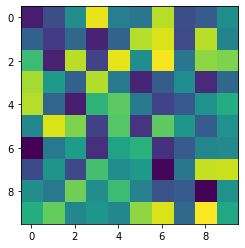

<AxesSubplot:>

In [21]:
data= np.random.random((10,10)) # 2 represent dimention (height) , 3 represent number of bands and 6 represent widht (2,3) represent shape

# converting array to list
li=data.tolist()


show(data)


# Dealing with Spatial  Raster

- 2-d array in raster represent single band
- 3-d - multy band
characteristics of raster
- Area is subdivided into grids with equal cells
- each piel has only one value of DN
- X and Y of pixel is spatial resolution, so area is simply culculated as area of 1 pixel multibly by total number of bixels. (x*y) * Number of cells

- each pixel value in raster represent reflectance value of feature on the surface of the earth

# Creating Raster from scratch

- Geospatial raster is made up of array of values linked to geographic information with the following characteristics -:
1. Transformation matrix linking pixel index with coordintes (x minimum and y maximum, origin (0,0))
# example
- if raster values is ploted in a cartesian plane without transformation the north-west cordinate values is (0,0) since rasterio will plot based on index values,in order to plot this in its position on earth surface we need a transformation matrix that will transform this "cordinadte"(0,0) to exact cordinates on the surface,
- resolution (pixel size) it is delta x and delta uy, for a Landsat image it is 30m

2. coordinate referwence system SRC
3. meta data which is pass as a dictionarry
# - Note that : there is difference between Transformation and Projection.
projection is transformation of spherical earth into a planar surface
- when Transformation is done it causes different distortion on 
1. shape
2. area
3. direction
4. shape 
types of map projectio includes -:
- conformal- local shapes are preserved
- equal area -  areas are preserved
- Azimuthal - direction from a single location to all location are preseved
- equidistrance - distance to all other location are preserved
- - projection surface include
1. Cylinder
2. cone
3. plane
- - Transformation take a matrix for changing values
- transform (1,5) with factor (2,-3) = new cordinates will be (3,2)

# steps
- creating random array of values values using numpy and reshaping it into a two dimentional 
- we use round() function to round off to a 4 decimal place by passing 4 to the function
- another function to arrange values in in numpy is np.arrange(fro,to dtypes=uint8)
    

- Create 10000 random numbers between 0 and 255
1. np.random.uniform(0,255,100) 
2. reshape the numpy array to relfect 2d of raster


In [22]:

arr_val =np.random.uniform(0,255,10000)

In [23]:
data=arr_val.reshape(100,100).round(4)
#de # de.dtype=np.uint8 to convert to intergers



# plotting

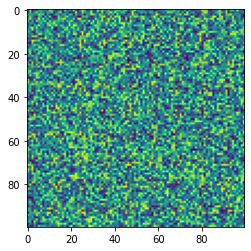

<AxesSubplot:>

In [24]:
show(data)

- count------> Number of layers(bands)
- height ----> Number of Rows
- width------> Number of columns

# transforming to position on earth
- for this example we will use abitrary tranformation

- let set origin "(0.0)" to be
1. xmin,ymax =(10000,5000)
2. Resolution to be delta x, delta y(2,-2)
- this will mean that x values will be increasing by 2 from the x transformation matrix and y will be reducing by 2 from transformation matrix
- Affine(delta_x, 0.0, xmin,
        0.0, delta_y, ymax)
# example 
- [0,0]=10000,5000
- [0,1] =(10000, 4998); [0,2]= (10000,4996) 
- [1,0] = (10002,5000); [2,0] = (10004,5000)
- [xn,yn] =((10000+(2*n)),( 5000-(2*n)))

# lets define our transformation in practice
- lets define corner coordinates and resolution

In [25]:
spatial_attributes=rasterio.transform.from_origin(
west= 10000,# xmin
north= 5000, # ymax
xsize= 2, # delta_x
ysize= 2) # delta_y

spatial_attributes

Affine(2.0, 0.0, 10000.0,
       0.0, -2.0, 5000.0)

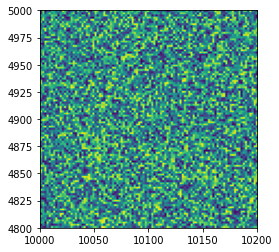

<AxesSubplot:>

In [26]:
show(data, transform= spatial_attributes)

# Writing single-band
spatial raster has metadata
- lets define our metadata for above data

In [27]:
meta={
    'driver':'GTiff',
    'count':1,
    'height':data.shape[0],
    'width': data.shape[1],
    'dtype':data.dtype,
    'transform': spatial_attributes
}


- we are passing value and key arguments (kwargs) using **

In [30]:
new_dt=rasterio.open("datatif",'w', **meta)
new_dt.write(data,1)
new_dt.close()

# alternatively 

In [31]:

new_data= rasterio.open("raster.tif", 'w',
                       driver='GTiff',
    count=1,
    height=data.shape[0],
    width= data.shape[1],
    dtype=data.dtype,
    transform= spatial_attributes)
new_data.write(data,1)
new_data.close()

In [32]:
de_r=rasterio.open("raster.tif")
rd=de_r.read()
rd

array([[[ 33.5286, 217.066 ,   4.309 , ..., 117.5561,  84.791 ,
          58.2391],
        [ 19.036 , 200.8366,  50.7549, ...,  59.3999,  71.214 ,
         152.3728],
        [151.4174, 143.4949, 150.9301, ..., 134.0376,  53.1054,
           5.5066],
        ...,
        [163.0924, 158.1196,   3.1501, ..., 114.955 ,  60.778 ,
          58.0782],
        [  7.3448, 121.5274,  42.7872, ...,  64.6322, 111.6321,
          57.5773],
        [ 64.4574,  25.7383,  18.7323, ..., 137.7618, 186.2934,
         176.2403]]])

<AxesSubplot:title={'center':'random'}>

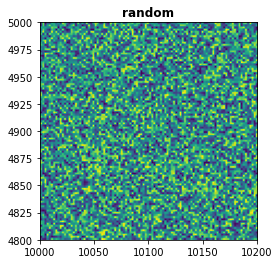

In [33]:

fig,ax =plt.subplots()
rasterio.plot.show(de_r,transform= spatial_attributes,ax=ax,title="random")

# classification of raster
- we classify numpy value array 

In [34]:
f=data.copy()
f[(data>0)&(data<50)]=0
f[(data>50)&(data<100)]=1
f[(data>100)&(data<150)]=2
f[(data>150)&(data<200)]=3
f[(data>200)& (data<=255)]=4

print(np.min(data),np.max(data))
print(np.min(f),np.max(f))

0.0587 254.9979
0.0 4.0


In [36]:
de_r.meta

{'driver': 'GTiff',
 'dtype': 'float64',
 'nodata': None,
 'width': 100,
 'height': 100,
 'count': 1,
 'crs': None,
 'transform': Affine(2.0, 0.0, 10000.0,
        0.0, -2.0, 5000.0)}